In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
data = pd.read_csv('data/output/final_ma_data_clean.csv', encoding='latin-1')


In [211]:
# show all columns 
pd.set_option('display.max_columns', None)
data['partd'].value_counts()

Yes    148949
No      54922
Name: partd, dtype: int64

In [21]:
data['plan_type'].unique()

array(['Local PPO', 'HMO/HMOPOS', 'PFFS', '1876 Cost',
       'PSO (State License)', 'Regional PPO', 'MSA'], dtype=object)

In [22]:
# show column that contain string enrollment
enrollment = data.columns[data.columns.str.contains('enrollment')]
data[data['year']==2009]['avg_eligibles'].mean()

39345.92508953966

(array([1295., 3327., 6586., 3698., 2210., 1444.,  426.]),
 array([1.5       , 1.92857143, 2.35714286, 2.78571429, 3.21428571,
        3.64285714, 4.07142857, 4.5       ]),
 <BarContainer object of 7 artists>)

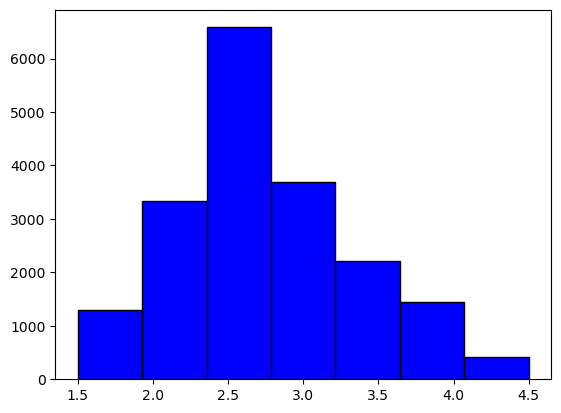

In [23]:
# plot a histogram of the star rating
plt.hist(data[(data['year']==2009)&(~data['avg_enrollment'].isna())&(~data['partc_score'].isna())]['Star_Rating'], bins=7, color='blue', edgecolor='black')

In [31]:
data['year']

0         2009
1         2009
2         2009
3         2009
4         2009
          ... 
140273    2015
140274    2015
140275    2015
140276    2015
140277    2015
Name: year, Length: 140278, dtype: int64

In [212]:
ma_data = pd.read_csv('data/output/full_ma_data.csv', encoding='latin-1')

C:\Users\huang\AppData\Local\Temp\ipykernel_17500\545125340.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  ma_data = pd.read_csv('data/output/full_ma_data.csv', encoding='latin-1')


In [213]:
data1 = ma_data[(ma_data['year']>2009)&(~ma_data['avg_enrollment'].isna())&(ma_data['snp']=='No')&(~ma_data['fips'].isna())&(~ma_data['planid'].isna())]
data1 = data1[(data1['planid']>900)|(data1['planid']<800)]

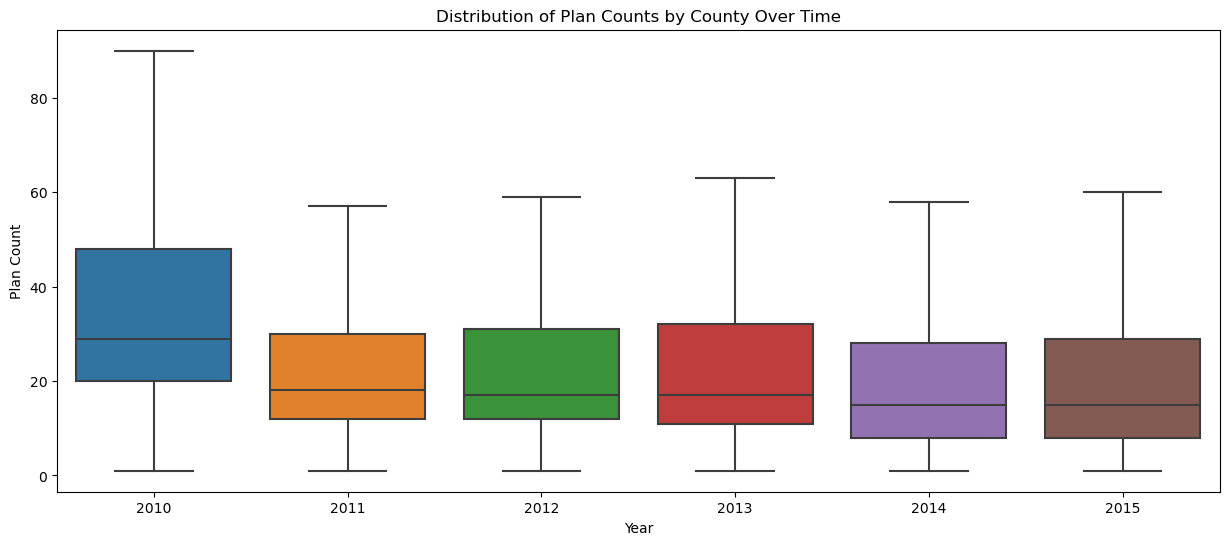

In [218]:
# Provide a box and whisker plot showing the distribution of plan counts by county over time
plan_count_county = data1.groupby(['year', 'county']).agg({'planid': 'count'}).reset_index()
plt.figure(figsize=(15, 6))
# boxplot with log scale
sns.boxplot(x='year', y='planid', data=plan_count_county, showfliers=False)
plt.title('Distribution of Plan Counts by County Over Time')
plt.ylabel('Plan Count')
plt.xlabel('Year')
q1_fig = plt.gcf()
plt.show()


In [217]:
data1 = pd.read_csv('data/output/final_ma_data.csv', encoding='latin-1')
data1 = data1[(data1['year']>2009)&(data1['snp']=='No')&(~data1['fips'].isna())]
data1 = data1[(data1['planid']>900)|(data1['planid']<800)]   

C:\Users\huang\AppData\Local\Temp\ipykernel_17500\380339559.py:1: DtypeWarning: Columns (10,68,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('data/output/final_ma_data.csv', encoding='latin-1')


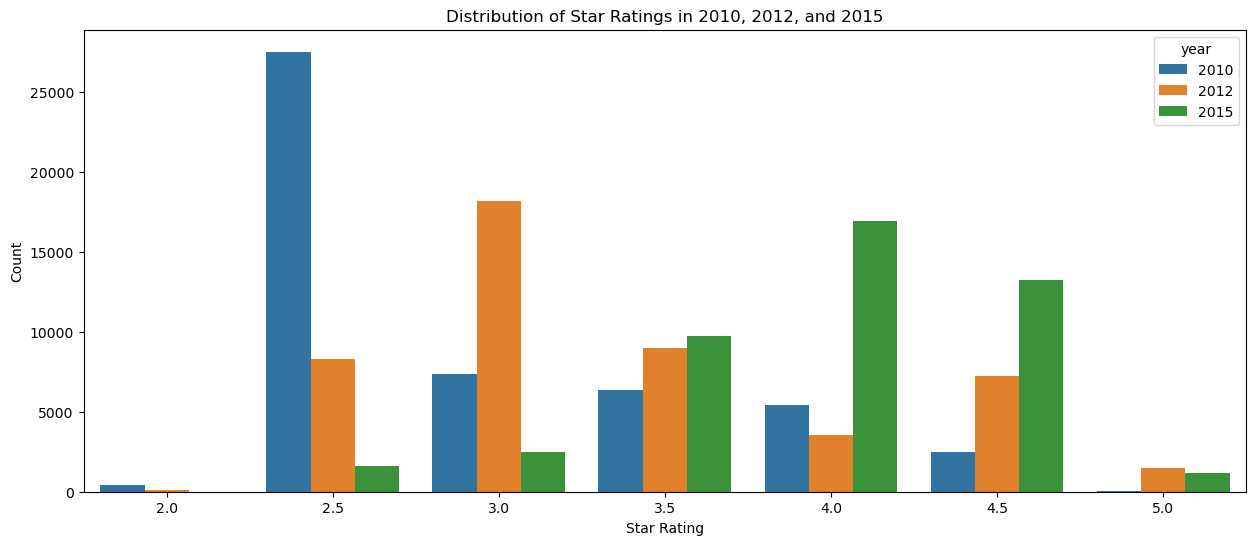

In [219]:
# Provide bar graphs showing the distribution of star ratings in 2010, 2012, and 2015.
star_rating = data1[data1['year'].isin([2010, 2012, 2015])]
plt.figure(figsize=(15, 6))
sns.countplot(x='Star_Rating', hue='year', data=star_rating)
plt.title('Distribution of Star Ratings in 2010, 2012, and 2015')
plt.ylabel('Count')
plt.xlabel('Star Rating')
q2_fig = plt.gcf()
plt.show()

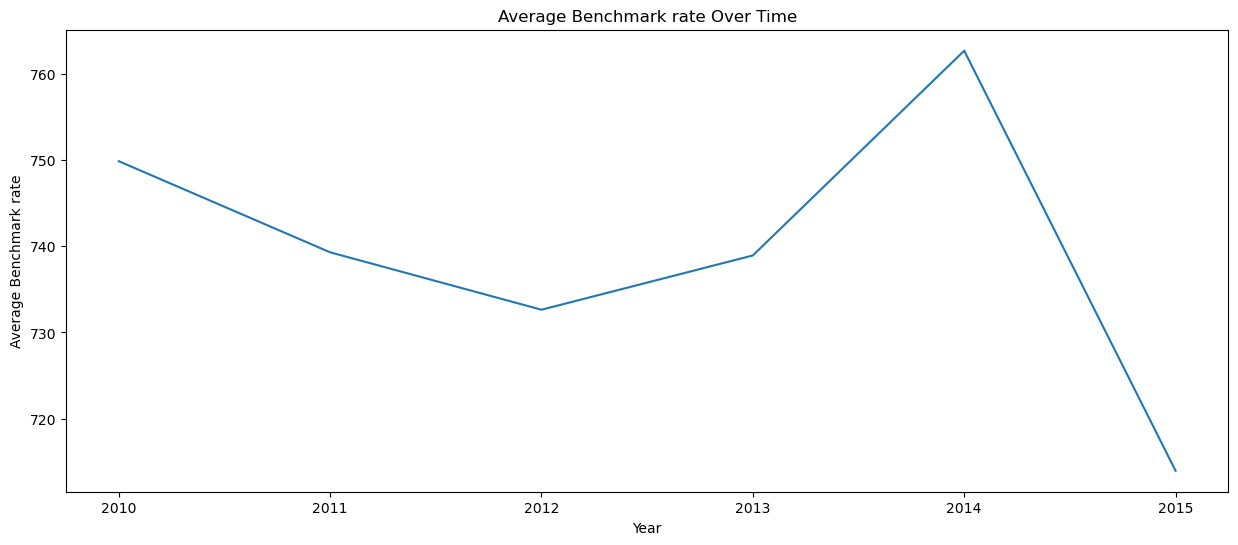

In [537]:
# Plot the average benchmark payment over time from 2010 through 2015
plt.figure(figsize=(15, 6))
rebate_year = data1.groupby('year').agg({'payment_partc': 'mean'}).reset_index()
sns.lineplot(x='year', y='payment_partc', data=rebate_year)
plt.title('Average Benchmark rate Over Time')
plt.ylabel('Average Benchmark rate')
plt.xlabel('Year')
q3_rate_fig = plt.gcf()
plt.show()


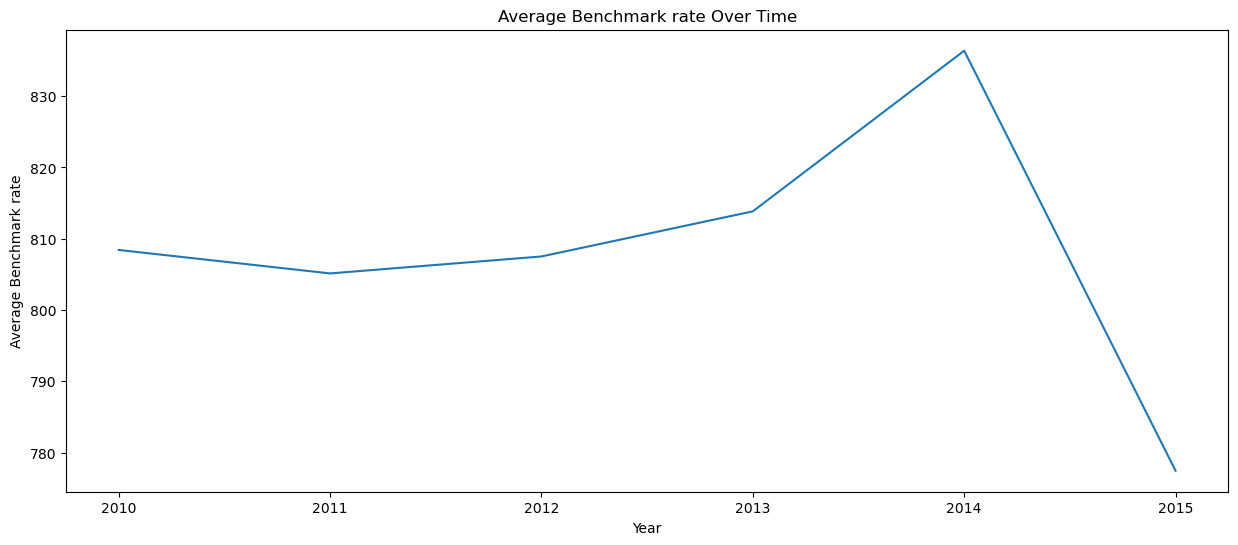

In [234]:
plt.figure(figsize=(15, 6))
data_bench = data1[(data1['partc_score'].notna())&(data1['avg_enrollment'].notna())]
rebate_year = data_bench.groupby('year').agg({'ma_rate': 'mean'}).reset_index()
sns.lineplot(x='year', y='ma_rate', data=rebate_year)
plt.title('Average Benchmark rate Over Time')
plt.ylabel('Average Benchmark rate')
plt.xlabel('Year')
q3_rate_fig = plt.gcf()
plt.show()

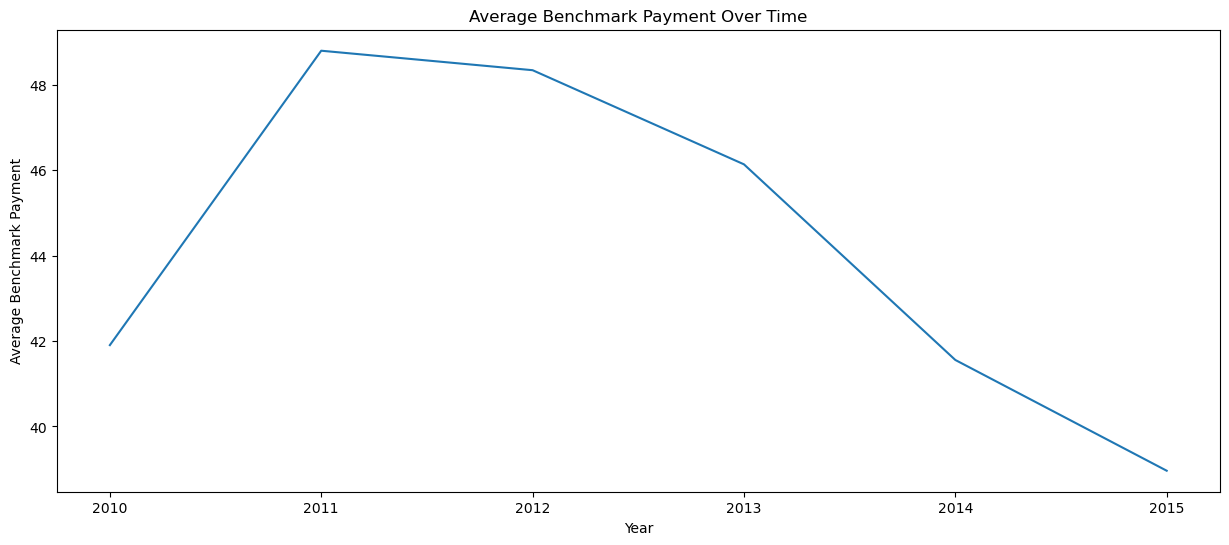

In [233]:
# Plot the average benchmark payment over time from 2010 through 2015
plt.figure(figsize=(15, 6))
rebate_year = data1.groupby('year').agg({'rebate_partc': 'mean'}).reset_index()
sns.lineplot(x='year', y='rebate_partc', data=rebate_year)
plt.title('Average Benchmark Payment Over Time')
plt.ylabel('Average Benchmark Payment')
plt.xlabel('Year')
q3_payment_fig = plt.gcf()
plt.show()


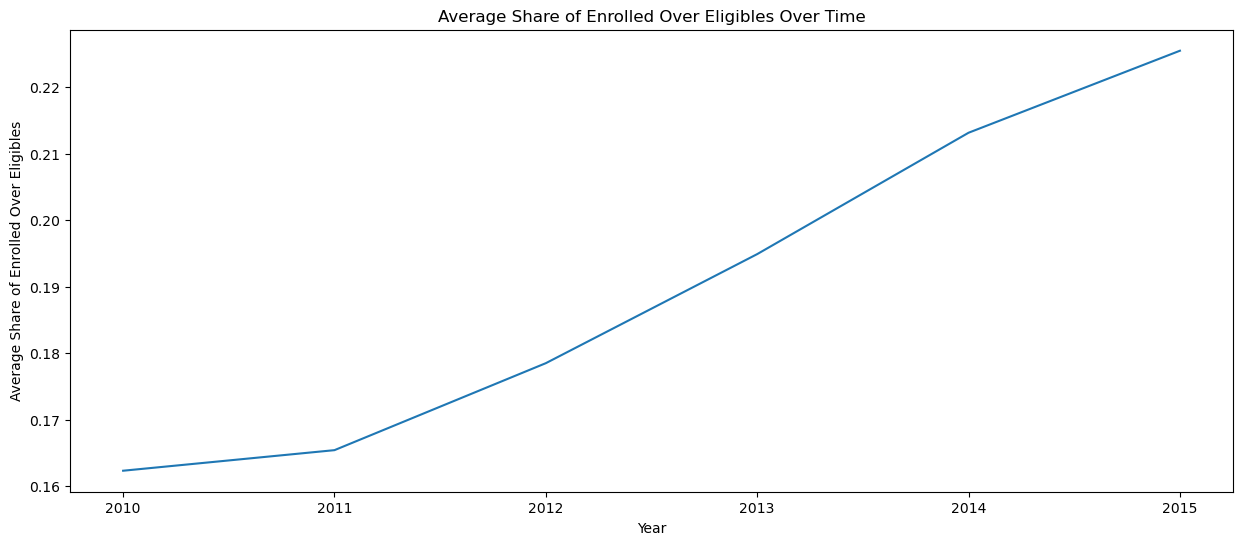

In [224]:
avg_share = data1.groupby(['year','county', 'fips','state']).agg({'avg_enrolled': 'mean', 'avg_eligibles': 'mean'}).reset_index()
avg_share['avg_share'] = avg_share['avg_enrolled']/avg_share['avg_eligibles']
avg_share = avg_share.groupby('year').agg({'avg_share': 'mean'}).reset_index()
plt.figure(figsize=(15, 6))
sns.lineplot(x='year', y='avg_share', data=avg_share)
plt.title('Average Share of Enrolled Over Eligibles Over Time')
plt.ylabel('Average Share of Enrolled Over Eligibles')
plt.xlabel('Year')
q4_fig = plt.gcf()
plt.show()


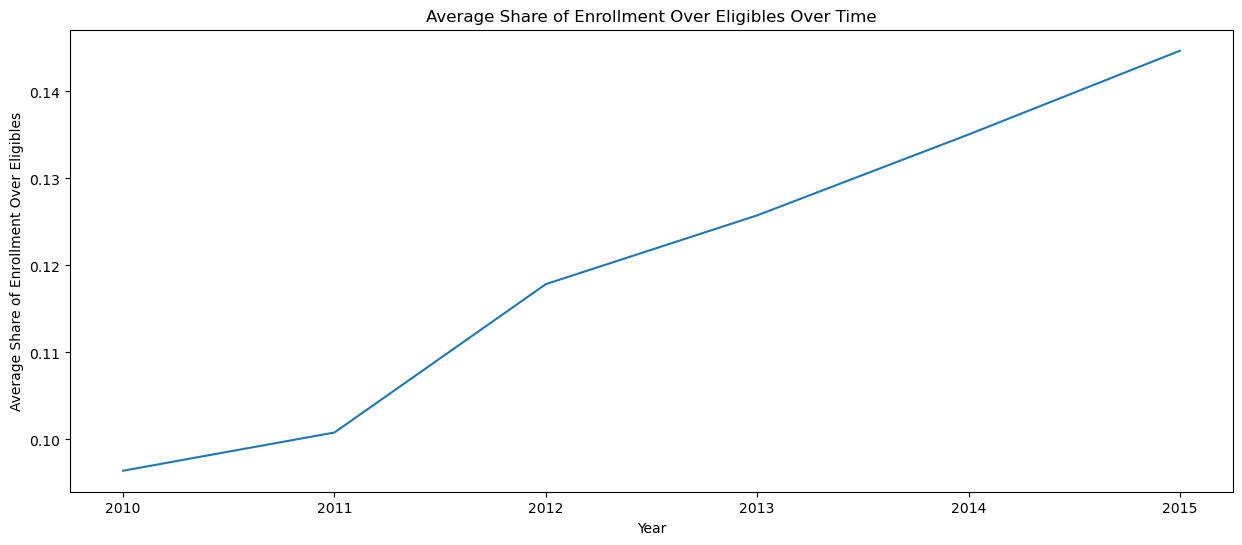

In [495]:
avg_share = data1.groupby(['year','county', 'fips','state']).agg({'avg_enrollment': 'sum', 'avg_eligibles': 'mean'}).reset_index()
avg_share['avg_share'] = avg_share['avg_enrollment']/avg_share['avg_eligibles']
avg_share = avg_share.groupby('year').agg({'avg_share': 'mean'}).reset_index()
plt.figure(figsize=(15, 6))
sns.lineplot(x='year', y='avg_share', data=avg_share)
plt.title('Average Share of Enrollment Over Eligibles Over Time')
plt.ylabel('Average Share of Enrollment Over Eligibles')
plt.xlabel('Year')
plt.show()


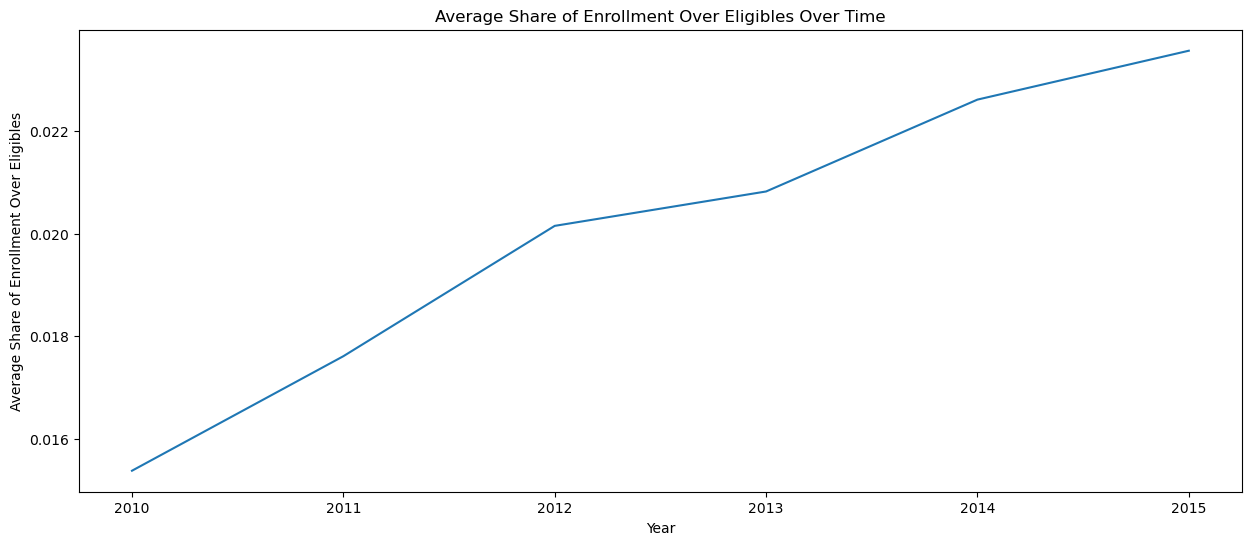

In [496]:
avg_share = data1.groupby(['year','county', 'fips','state']).agg({'avg_enrollment': 'mean', 'avg_eligibles': 'mean'}).reset_index()
avg_share['avg_share'] = avg_share['avg_enrollment']/avg_share['avg_eligibles']
avg_share = avg_share.groupby('year').agg({'avg_share': 'mean'}).reset_index()
plt.figure(figsize=(15, 6))
sns.lineplot(x='year', y='avg_share', data=avg_share)
plt.title('Average Share of Enrollment Over Eligibles Over Time')
plt.ylabel('Average Share of Enrollment Over Eligibles')
plt.xlabel('Year')
q4_fig = plt.gcf()
plt.show()


In [232]:
data1 = data[(data['year']>2009)]

In [231]:
rd = data1[data1['year']==2010]

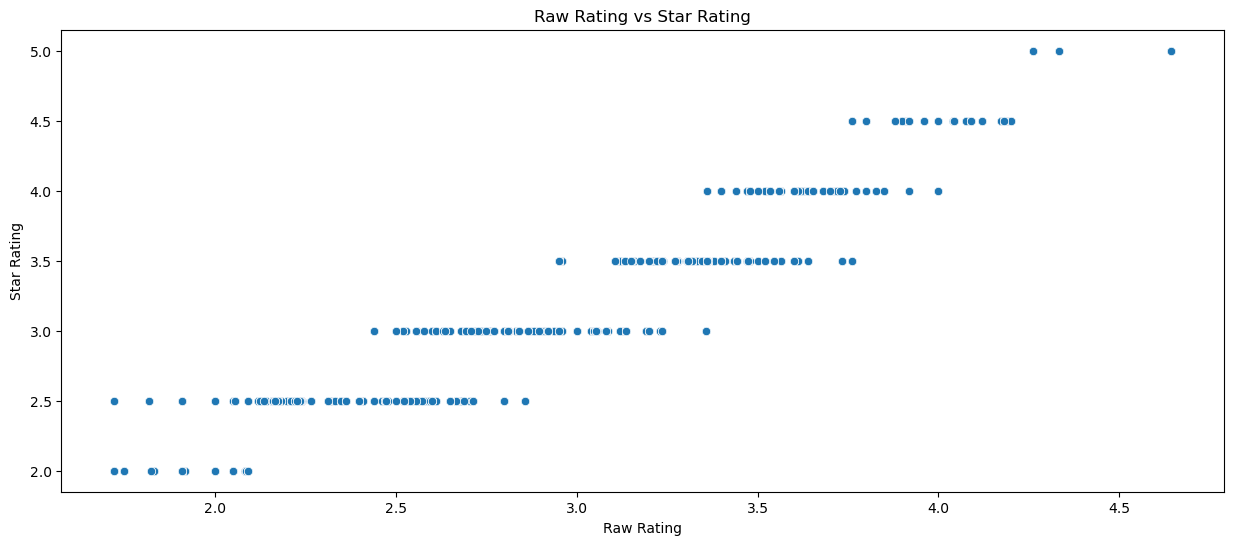

In [227]:
# plot raw rating against star rating
plt.figure(figsize=(15, 6))
sns.scatterplot(x='raw_rating', y='Star_Rating', data=rd)
plt.title('Raw Rating vs Star Rating')
plt.ylabel('Star Rating')
plt.xlabel('Raw Rating')
q5_fig = plt.gcf()    
plt.show()



In [54]:
rd['Star_Rating'].value_counts()

2.5    6962
3.0    3034
3.5    2879
4.0    2050
4.5    1164
2.0     198
5.0      50
Name: Star_Rating, dtype: int64

In [177]:
three_star = rd[(rd['raw_rating']<3)&(rd['raw_rating']>=2.75)&(rd['Star_Rating']==3)]['Star_Rating'].count()
three_star

1734

In [56]:
threefive_star = rd[(rd['raw_rating']<3.5)&(rd['raw_rating']>=3.25)&(rd['Star_Rating']==3.5)]['Star_Rating'].count()
threefive_star

1815

In [57]:
four_star = rd[(rd['raw_rating']<4)&(rd['raw_rating']>3.75)&(rd['Star_Rating']==4)]['Star_Rating'].count()
four_star

606

In [58]:
fourfive_star = rd[(rd['raw_rating']<4.5)&(rd['raw_rating']>4.25)&(rd['Star_Rating']==4.5)]['Star_Rating'].count()
fourfive_star

0

In [59]:
five_star = rd[(rd['raw_rating']<5)&(rd['raw_rating']>4.75)&(rd['Star_Rating']==5)]['Star_Rating'].count()
five_star

0

In [13]:
# summerize the above data
star_rating = pd.DataFrame({'Rating': ['3', '3.5', '4', '4.5', '5'], '#roundup': [three_star, threefive_star, four_star, fourfive_star, five_star]})
q5_table = star_rating
q5_table

,Rating,#roundup
0,3,1734
1,3.5,1815
2,4,606
3,4.5,0
4,5,0


RD

In [189]:
bw = 0.125
star = 3
raw = star - 0.25

# mute the warning
pd.options.mode.chained_assignment = None


rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))&(rd['Star_Rating']>=star-0.5)&(rd['Star_Rating']<=star)]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
# rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['Star_Rating']==star, 1, 0)
rd1['treat_score'] = rd1['treat']*rd1['raw_rating']

# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model1 = smf.ols('mrkt_share ~ 1 + treat + raw_rating', data=rd1).fit()

In [190]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             mrkt_share   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     42.85
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           3.52e-19
Time:                        00:19:53   Log-Likelihood:                 13750.
No. Observations:                5084   AIC:                        -2.749e+04
Df Residuals:                    5081   BIC:                        -2.747e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0440      0.007      5.958      0.000       0.030       0.059
treat          0.0046      0.001      8.664      0.000       0.004       0.006
raw_rating    -0.0123      0.003     -4.583      0.000      -0.018      -0.007
==============================================================================
Omnibus:                     4548.676   Durbin-Watson:                   1.204
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           176394.815
Skew:                           4.236   Prob(JB):                         0.00
Kurtosis:                      30.585   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
bw = 0.125
star = 3.5
raw = star - 0.25

# mute the warning
# pd.options.mode.chained_assignment = True



rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))&(rd['Star_Rating']>=star-0.5)&(rd['Star_Rating']<=star)]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['Star_Rating']==star, 1, 0)
# create a new column of interactino 
rd1['treat_score'] = rd1['treat']*rd1['raw_rating']

# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model2 = smf.ols('mrkt_share ~ 1 + treat + raw_rating', data=rd1).fit()

In [192]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             mrkt_share   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.292
Date:                Fri, 12 Apr 2024   Prob (F-statistic):             0.0138
Time:                        00:20:10   Log-Likelihood:                 3926.4
No. Observations:                1733   AIC:                            -7847.
Df Residuals:                    1730   BIC:                            -7830.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0994      0.030      3.362      0.001       0.041       0.157
treat          0.0032      0.002      1.766      0.077      -0.000       0.007
raw_rating    -0.0264      0.009     -2.863      0.004      -0.045      -0.008
==============================================================================
Omnibus:                     1512.318   Durbin-Watson:                   0.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42176.326
Skew:                           4.103   Prob(JB):                         0.00
Kurtosis:                      25.733   Cond. No.                         181.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
# model 1 and model 2 in a table
from statsmodels.iolib.summary2 import summary_col
info_dict={'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[model1, model2],
                            float_format='%0.3f',
                            stars = True,
                            model_names=['star=3', 'star=3.5'], 
                            info_dict=info_dict,
                            regressor_order=['Intercept', 'treat', 'raw_rating', 'treat*raw_rating'])

results_table.add_title('Table 1 - RD Results for bandwidth 0.125')

# save the table in latex
with open('question6.tex', 'w') as f:
    f.write(results_table.as_latex())

print(results_table)



Table 1 - RD Results for bandwidth 0.125
                   star=3   star=3.5
------------------------------------
Intercept        0.044***  0.099*** 
                 (0.007)   (0.030)  
treat            0.005***  0.003*   
                 (0.001)   (0.002)  
raw_rating       -0.012*** -0.026***
                 (0.003)   (0.009)  
R-squared        0.017     0.005    
R-squared Adj.   0.016     0.004    
No. observations 5084      1733     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


different cutoff - star 3

In [193]:
bw = 0.1
star = 3
raw = star - 0.25

# mute the warning
pd.options.mode.chained_assignment = None


rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))&(rd['Star_Rating']>=star-0.5)&(rd['Star_Rating']<=star)]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['Star_Rating']==star, 1, 0)
rd1['treat_score'] = rd1['treat']*rd1['raw_rating']

# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model1 = smf.ols('mrkt_share ~ 1 + treat + raw_rating', data=rd1).fit()

In [194]:
bw = 0.12
star = 3
raw = star - 0.25

# mute the warning
pd.options.mode.chained_assignment = None


rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))&(rd['Star_Rating']>=star-0.5)&(rd['Star_Rating']<=star)]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['Star_Rating']==star, 1, 0)
rd1['treat_score'] = rd1['treat']*rd1['raw_rating']

# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model2 = smf.ols('mrkt_share ~ 1 + treat + raw_rating', data=rd1).fit()

In [195]:
bw = 0.13
star = 3
raw = star - 0.25

# mute the warning
pd.options.mode.chained_assignment = None

rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))&(rd['Star_Rating']>=star-0.5)&(rd['Star_Rating']<=star)]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['Star_Rating']==star, 1, 0)
rd1['treat_score'] = rd1['treat']*rd1['raw_rating']

# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model3 = smf.ols('mrkt_share ~ 1 + treat + raw_rating', data=rd1).fit()

In [196]:
bw = 0.14
star = 3
raw = star - 0.25

# mute the warning
pd.options.mode.chained_assignment = None


rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))&(rd['Star_Rating']>=star-0.5)&(rd['Star_Rating']<=star)]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['Star_Rating']==star, 1, 0)
rd1['treat_score'] = rd1['treat']*rd1['raw_rating']

# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model4 = smf.ols('mrkt_share ~ 1 + treat + raw_rating', data=rd1).fit()


In [197]:
bw = 0.15
star = 3
raw = star - 0.25

# mute the warning
pd.options.mode.chained_assignment = None


rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))&(rd['Star_Rating']>=star-0.5)&(rd['Star_Rating']<=star)]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['Star_Rating']==star, 1, 0)
rd1['treat_score'] = rd1['treat']*rd1['raw_rating']

# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model5 = smf.ols('mrkt_share ~ 1 + treat + raw_rating', data=rd1).fit()

In [198]:
# all the models in a table

results_table = summary_col(results=[model1, model2, model3, model4, model5],
                            float_format='%0.5f',
                            stars = True,
                            model_names=['bandwidth=0.1', 'bandwidth=0.12', 'bandwidth=0.13', 'bandwidth=0.14', 'bandwidth=0.15'], 
                            info_dict=info_dict,
                            regressor_order=['Intercept', 'treat', 'raw_rating', 'treat*raw_rating'])

results_table.add_title('Table 2 - RD Results for star rating 3')

# save the table in latex
with open('question7_1.tex', 'w') as f:
    f.write(results_table.as_latex())

print(results_table)

                          Table 2 - RD Results for star rating 3
                 bandwidth=0.1 bandwidth=0.12 bandwidth=0.13 bandwidth=0.14 bandwidth=0.15
------------------------------------------------------------------------------------------
Intercept        0.02868       0.04402***     0.04467***     0.04127***     0.03033***    
                 (0.02989)     (0.00739)      (0.00737)      (0.00722)      (0.00691)     
treat            0.00346**     0.00459***     0.00453***     0.00419***     0.00481***    
                 (0.00147)     (0.00053)      (0.00053)      (0.00052)      (0.00050)     
raw_rating       -0.00668      -0.01229***    -0.01252***    -0.01130***    -0.00734***   
                 (0.01120)     (0.00268)      (0.00267)      (0.00262)      (0.00251)     
R-squared        0.00626       0.01659        0.01634        0.01422        0.01721       
R-squared Adj.   0.00566       0.01620        0.01596        0.01384        0.01684       
No. observations 3306    

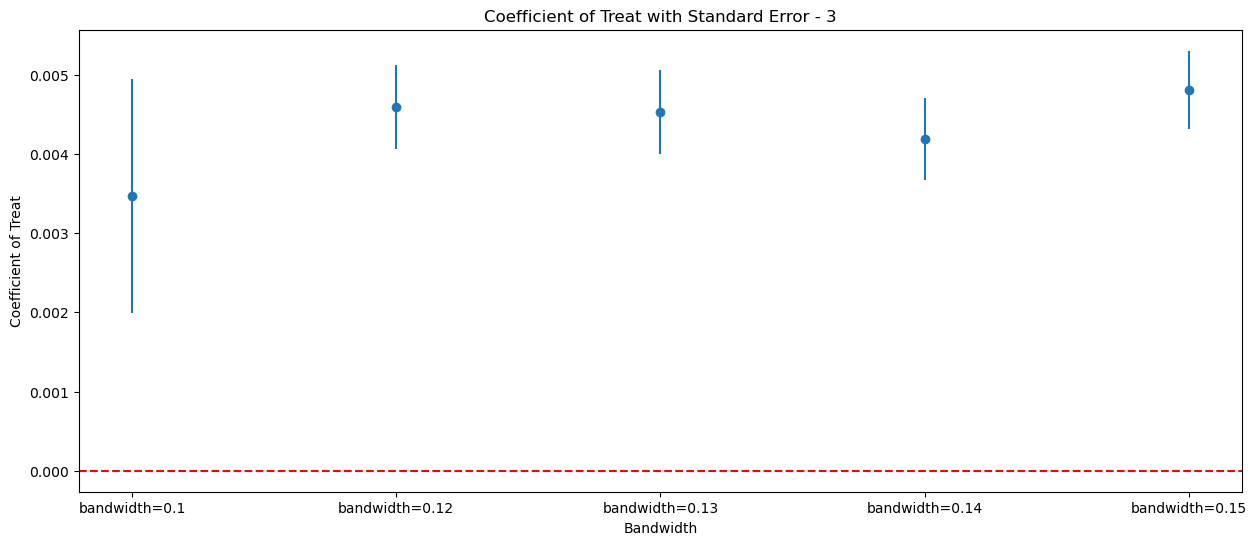

In [199]:
# plot the coefficients of treat with standard error
plt.figure(figsize=(15, 6))
plt.errorbar(x=['bandwidth=0.1', 'bandwidth=0.12', 'bandwidth=0.13', 'bandwidth=0.14', 'bandwidth=0.15'], y=[model1.params['treat'], model2.params['treat'], model3.params['treat'], model4.params['treat'], model5.params['treat']], yerr=[model1.bse['treat'], model2.bse['treat'], model3.bse['treat'], model4.bse['treat'], model5.bse['treat']], fmt='o')
plt.title('Coefficient of Treat with Standard Error - 3')
plt.ylabel('Coefficient of Treat')
plt.xlabel('Bandwidth')
# draw a horizontal line at 0
plt.axhline(y=0, color='r', linestyle='--')
q7_fig = plt.gcf()
plt.show()


different cutoff - star 3.5

In [200]:
bw = 0.1
star = 3.5
raw = star - 0.25

# mute the warning
pd.options.mode.chained_assignment = None


rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))&(rd['Star_Rating']>=star-0.5)&(rd['Star_Rating']<=star)]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['Star_Rating']==star, 1, 0)
rd1['treat_score'] = rd1['treat']*rd1['raw_rating']

# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model1 = smf.ols('mrkt_share ~ 1 + treat + raw_rating', data=rd1).fit()

In [201]:
bw = 0.12
star = 3.5
raw = star - 0.25

# mute the warning
pd.options.mode.chained_assignment = None


rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))&(rd['Star_Rating']>=star-0.5)&(rd['Star_Rating']<=star)]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['Star_Rating']==star, 1, 0)
rd1['treat_score'] = rd1['treat']*rd1['raw_rating']
# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model2 = smf.ols('mrkt_share ~ 1 + treat + raw_rating', data=rd1).fit()

In [202]:
bw = 0.13
star = 3.5
raw = star - 0.25

# mute the warning
pd.options.mode.chained_assignment = None

rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))&(rd['Star_Rating']>=star-0.5)&(rd['Star_Rating']<=star)]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['Star_Rating']==star, 1, 0)
rd1['treat_score'] = rd1['treat']*rd1['raw_rating']

# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model3 = smf.ols('mrkt_share ~ 1 + treat + raw_rating', data=rd1).fit()

In [203]:
bw = 0.14
star = 3.5
raw = star - 0.25

# mute the warning
pd.options.mode.chained_assignment = None

rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))&(rd['Star_Rating']>=star-0.5)&(rd['Star_Rating']<=star)]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['Star_Rating']==star, 1, 0)
rd1['treat_score'] = rd1['treat']*rd1['raw_rating']
# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model4 = smf.ols('mrkt_share ~ 1 + treat + raw_rating', data=rd1).fit()

In [204]:
bw = 0.15
star = 3.5
raw = star - 0.25

# mute the warning
pd.options.mode.chained_assignment = None


rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))&(rd['Star_Rating']>=star-0.5)&(rd['Star_Rating']<=star)]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['Star_Rating']==star, 1, 0)
rd1['treat_score'] = rd1['treat']*rd1['raw_rating']

# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model5 = smf.ols('mrkt_share ~ 1 + treat + raw_rating', data=rd1).fit()

In [205]:
# all the models in a table

results_table = summary_col(results=[model1, model2, model3, model4, model5],
                            float_format='%0.5f',
                            stars = True,
                            model_names=['bandwidth=0.1', 'bandwidth=0.12', 'bandwidth=0.13', 'bandwidth=0.14', 'bandwidth=0.15'], 
                            info_dict=info_dict,
                            regressor_order=['Intercept', 'treat', 'raw_rating', 'treat*raw_rating'])

results_table.add_title('Table 3 - RD Results for star rating 3.5')

# save the table in latex
with open('question7_2.tex', 'w') as f:
    f.write(results_table.as_latex())

print(results_table)

                         Table 3 - RD Results for star rating 3.5
                 bandwidth=0.1 bandwidth=0.12 bandwidth=0.13 bandwidth=0.14 bandwidth=0.15
------------------------------------------------------------------------------------------
Intercept        0.14058**     0.09694***     0.09563***     0.09737***     0.07965***    
                 (0.05483)     (0.02972)      (0.02815)      (0.02755)      (0.01963)     
treat            0.01241***    0.00340*       0.00360**      0.00362**      0.00234       
                 (0.00257)     (0.00183)      (0.00171)      (0.00170)      (0.00150)     
raw_rating       -0.04149**    -0.02572***    -0.02538***    -0.02592***    -0.02035***   
                 (0.01709)     (0.00926)      (0.00885)      (0.00866)      (0.00617)     
R-squared        0.01884       0.00483        0.00467        0.00497        0.00490       
R-squared Adj.   0.01724       0.00368        0.00359        0.00390        0.00400       
No. observations 1228   

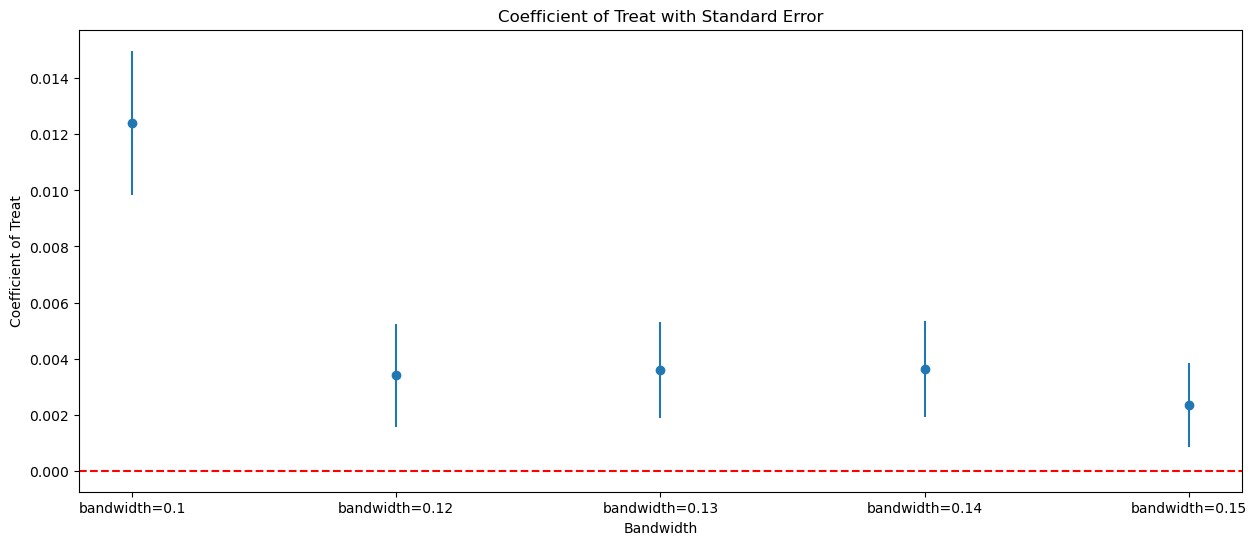

In [206]:
# plot the coefficients of treat with standard error
plt.figure(figsize=(15, 6))

plt.errorbar(x=['bandwidth=0.1', 'bandwidth=0.12', 'bandwidth=0.13', 'bandwidth=0.14', 'bandwidth=0.15'], y=[model1.params['treat'], model2.params['treat'], model3.params['treat'], model4.params['treat'], model5.params['treat']], yerr=[model1.bse['treat'], model2.bse['treat'], model3.bse['treat'], model4.bse['treat'], model5.bse['treat']], fmt='o')
plt.title('Coefficient of Treat with Standard Error')
plt.ylabel('Coefficient of Treat')
plt.xlabel('Bandwidth')
# draw a horizontal line at 0
plt.axhline(y=0, color='r', linestyle='--')
q7_fig_2 = plt.gcf()
plt.show()


Manipulaiton

In [161]:
mani_above_275 = rd[(rd['raw_rating']>=2.5)&(rd['raw_rating']<=2.75)]
mani_below_275 = rd[(rd['raw_rating']<=3)&(rd['raw_rating']>=2.75)]

mani_above_325 = rd[(rd['raw_rating']>=3.25)&(rd['raw_rating']<=3.5)]
mani_below_325 = rd[(rd['raw_rating']<=3.25)&(rd['raw_rating']>=3)]

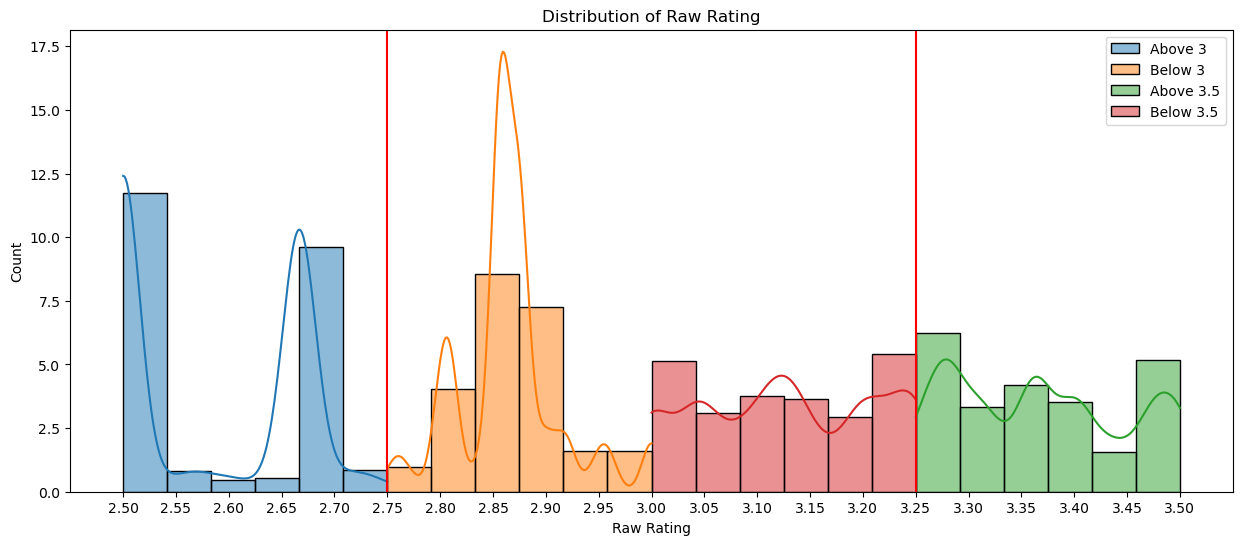

In [163]:
# distribution of raw rating
plt.figure(figsize=(15, 6))
sns.histplot(mani_above_275['raw_rating'], bins=6, label='Above 3', kde=True, stat='density')
sns.histplot(mani_below_275['raw_rating'], bins=6, label='Below 3', kde=True, stat='density')
sns.histplot(mani_above_325['raw_rating'], bins=6, label='Above 3.5', kde=True, stat='density')
sns.histplot(mani_below_325['raw_rating'], bins=6, label='Below 3.5', kde=True, stat='density')
plt.title('Distribution of Raw Rating')
plt.ylabel('Count')
plt.xlabel('Raw Rating')
plt.xticks(np.arange(2.5, 3.51, 0.05))
# draw two vertical line at 2.75 and 3.25
plt.axvline(x=2.75, color='red')
plt.axvline(x=3.25, color='red')
plt.legend()
q8_fig = plt.gcf()
plt.show()


characteristics

In [252]:
rd['plan_type'].unique()

array(['Local PPO', 'HMO/HMOPOS', 'PFFS', '1876 Cost',
       'PSO (State License)', 'Regional PPO'], dtype=object)

In [238]:
rd['PartD'] = np.where(rd['partd']=='Yes', 1, 0)
rd['HMO'] = np.where(rd['plan_type']=='HMO/HMOPOS', 1, 0)

In [243]:
mani_above_275 = rd[(rd['raw_rating']>=2.5)&(rd['raw_rating']<=2.75)]

mani_below_275 = rd[(rd['raw_rating']<=3)&(rd['raw_rating']>=2.75)]

mani_above_325 = rd[(rd['raw_rating']>=3.25)&(rd['raw_rating']<=3.5)]
mani_below_325 = rd[(rd['raw_rating']<=3.25)&(rd['raw_rating']>=3)]

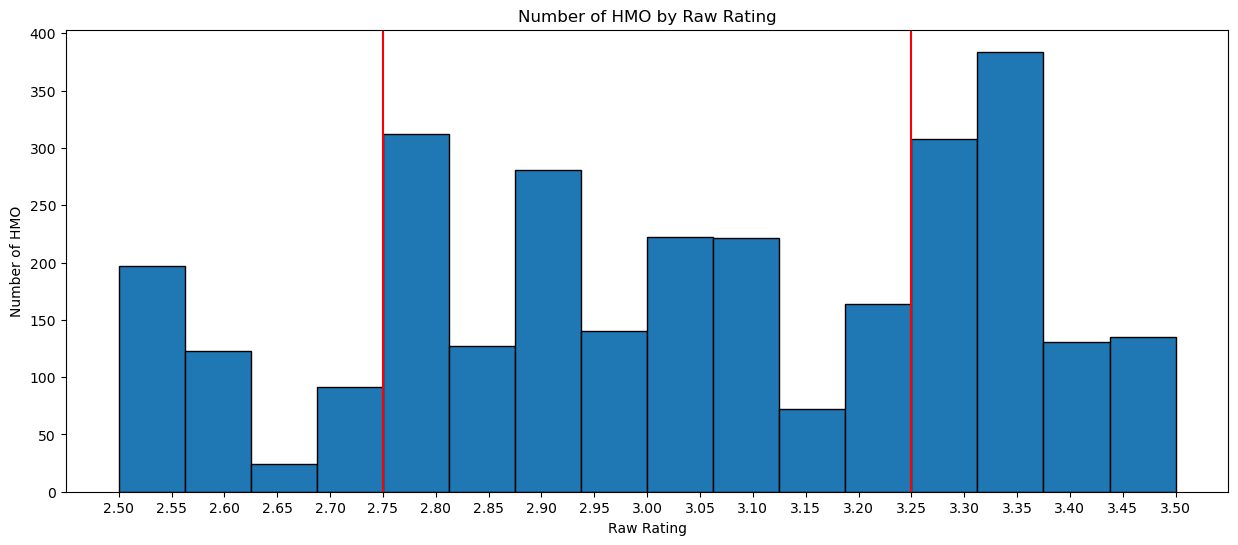

In [244]:
import numpy as np
import matplotlib.pyplot as plt

target = rd[(rd['raw_rating']>=2.5)&(rd['raw_rating']<=3.5)]
# Group continuous scale into bins
bins = np.linspace(min(target['raw_rating']), max(target['raw_rating']), 17)

# Calculate proportion of binary variable for each bin
proportions = []
for i in range(len(bins) - 1):
    bin_start = bins[i]
    bin_end = bins[i + 1]
    mask = (target['raw_rating'] >= bin_start) & (target['raw_rating'] < bin_end)
    proportion = np.sum(target[mask]['HMO'])
    proportions.append(proportion)

# Plot histogram with proportions
plt.figure(figsize=(15, 6))
plt.bar(bins[:-1], proportions, width=bins[1]-bins[0], align='edge', edgecolor='black')
plt.xlabel('Raw Rating')
plt.ylabel('Number of HMO')
plt.title('Number of HMO by Raw Rating')
plt.xticks(np.arange(2.5, 3.51, 0.05))
# draw two vertical line at 2.75 and 3.25
plt.axvline(x=2.75, color='red')
plt.axvline(x=3.25, color='red')
q9_fig_1 = plt.gcf()
plt.show()



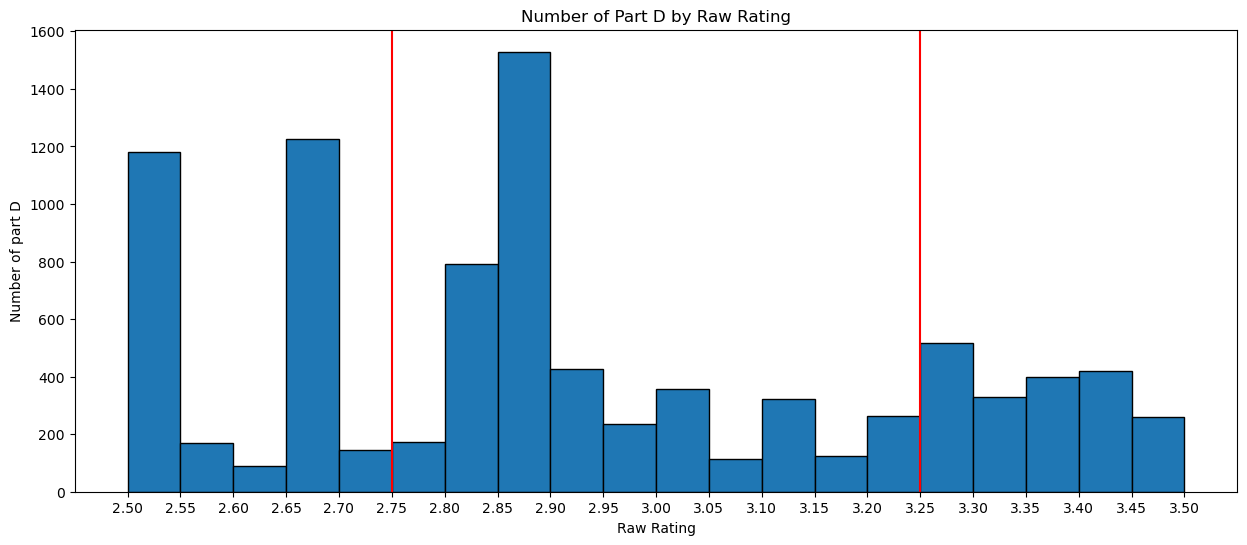

In [245]:
import numpy as np
import matplotlib.pyplot as plt

target = rd[(rd['raw_rating']>=2.5)&(rd['raw_rating']<=3.5)]
# Group continuous scale into bins
bins = np.linspace(min(target['raw_rating']), max(target['raw_rating']), 21)

# Calculate proportion of binary variable for each bin
proportions = []
for i in range(len(bins) - 1):
    bin_start = bins[i]
    bin_end = bins[i + 1]
    mask = (target['raw_rating'] >= bin_start) & (target['raw_rating'] < bin_end)
    proportion = np.sum(target[mask]['PartD'])
    proportions.append(proportion)

# Plot histogram with proportions
plt.figure(figsize=(15, 6))
plt.bar(bins[:-1], proportions, width=bins[1]-bins[0], align='edge', edgecolor='black')
plt.xlabel('Raw Rating')
plt.ylabel('Number of part D')
plt.title('Number of Part D by Raw Rating')
plt.xticks(np.arange(2.5, 3.51, 0.05))
# draw two vertical line at 2.75 and 3.25
plt.axvline(x=2.75, color='red')
plt.axvline(x=3.25, color='red')
q9_fig_2 = plt.gcf()
plt.show()



In [515]:
%pip install causallib

   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------- ------------------------------- 0.4/2.2 MB 9.2 MB/s eta 0:00:01
   ---------------- ----------------------- 0.9/2.2 MB 11.2 MB/s eta 0:00:01
   --------------------------- ------------ 1.5/2.2 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------  2.2/2.2 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 11.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   --- ------------------------------------ 0.7/7.5 MB 23.8 MB/s eta 0:00:01
   -------- ------------------------------- 1.5/7.5 MB 19.6 MB/s eta 0:00:01
   ----------- ---------------------------- 2.2/7.5 MB 17.4 MB/s eta 0:00:01
   --------------- ------------------------ 2.9/7.5 MB 16.9 MB/s eta 0:00:01
   ------------------- -------------------- 3.6/7.5 MB 16.5 MB/s eta 0:00:01
   ---------------------- ----------------- 4.3/7.5 MB 16.0 MB/s eta 0:00:01
   -------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
islp 0.3.22 requires scikit-learn>=1.2, but you have scikit-learn 1.1.3 which is incompatible.


In [236]:
from causallib.datasets import load_nhefs
from causallib.estimation import IPW
from causallib.evaluation import evaluate
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

c:\Users\huang\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


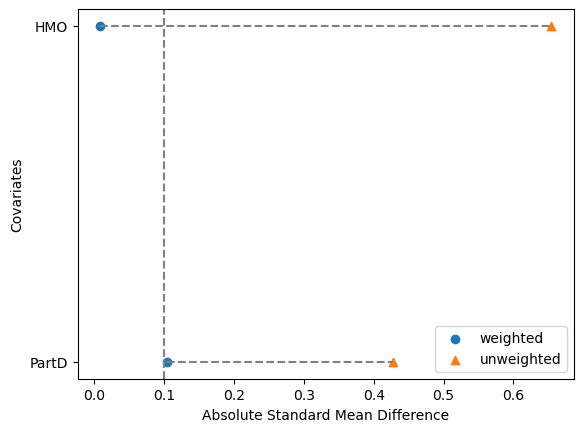

In [250]:
rd1 = rd[(rd['raw_rating']>=2.65)&(rd['raw_rating']<=2.85)]

rd1['treat'] = np.where(rd1['raw_rating']>=2.75, 1, 0)

from sklearn import metrics
ipw = IPW(LogisticRegression(solver="liblinear"))
results1 = evaluate(ipw, rd1[['HMO','PartD']], rd1['treat'], rd1['Star_Rating'], cv="auto")
ax = plt.gca()
results1.plot_covariate_balance(kind="love", ax=ax, thresh=0.1)
# save plot
question9_love = plt.gcf()
plt.show()

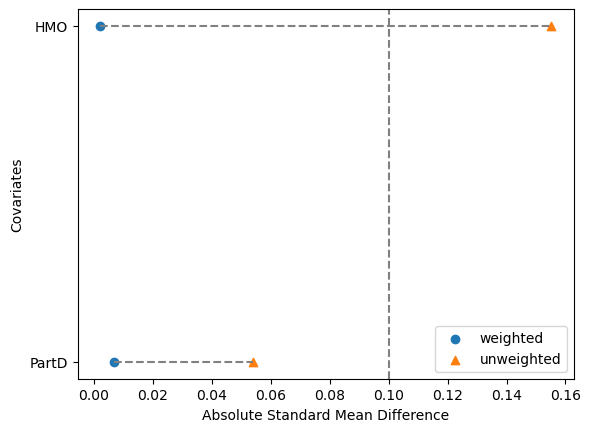

In [251]:

rd1 = rd[(rd['raw_rating']>=3.15)&(rd['raw_rating']<=3.35)]

rd1['treat'] = np.where(rd1['raw_rating']>=3.25, 1, 0)

from sklearn import metrics
ipw = IPW(LogisticRegression(solver="liblinear"))
results2 = evaluate(ipw, rd1[['HMO','PartD']], rd1['treat'], rd1['Star_Rating'], cv="auto")
ax = plt.gca()
results2.plot_covariate_balance(kind="love", ax=ax, thresh=0.1)
# save plot
question9_love_2 = plt.gcf()
plt.show()

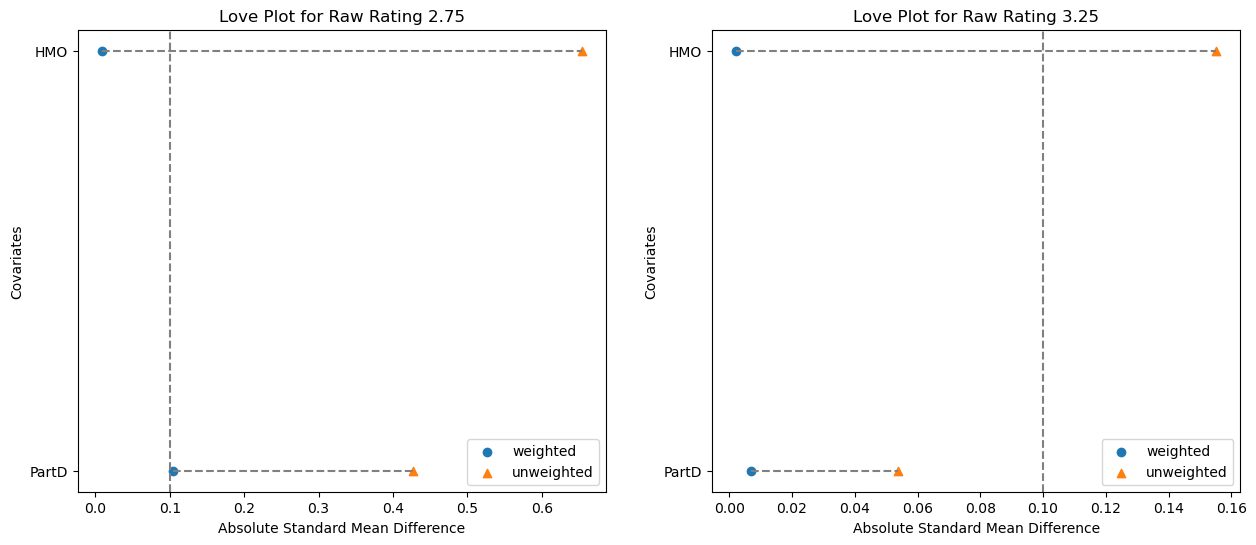

In [252]:
# put in one figure

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].set_title('Love Plot for Raw Rating 2.75')
results1.plot_covariate_balance(kind="love", ax=axs[0], thresh=0.1)
axs[1].set_title('Love Plot for Raw Rating 3.25')
results2.plot_covariate_balance(kind="love", ax=axs[1], thresh=0.1)

# save the figure
question9_love = plt.gcf()

plt.show()


In [253]:
import pickle

with open('hwk4_Q1-9.pkl', 'wb') as f:
    pickle.dump((q1_fig, q2_fig, q3_rate_fig, q4_fig, q5_fig, q5_table, q7_fig, q7_fig_2, q8_fig, q9_fig_1, q9_fig_2, question9_love), f)
